In [4]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from scipy import stats

# Set the random seed for reproducibility
np.random.seed(42)

In [5]:
# Set matplotlib as inline
%matplotlib inline  

In [6]:
# open data
data = pd.read_csv('data/assessment_da25.csv')
data.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


<Figure size 800x600 with 0 Axes>

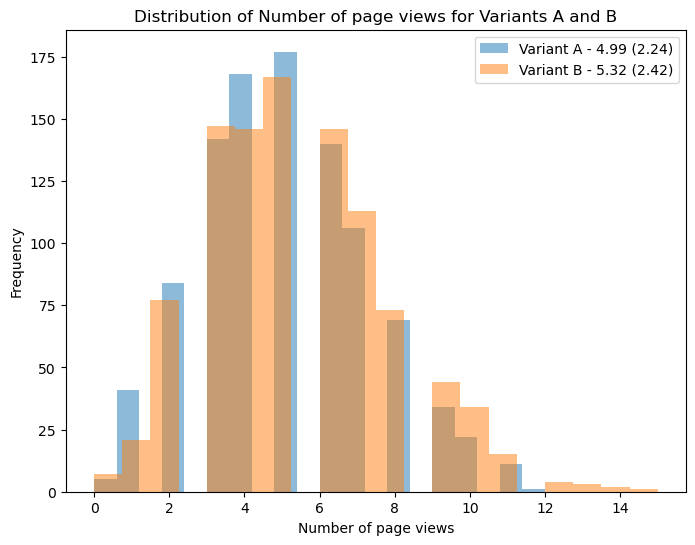

T-Statistic: -3.188164513387701
P-Value: 0.0007269712330182491
Reject H0? ie variant B is better True
=== No equal variance assumption
T-Statistic: -3.1881645133877003
P-Value: 0.000727038078607921
Reject H0? ie variant B is better True


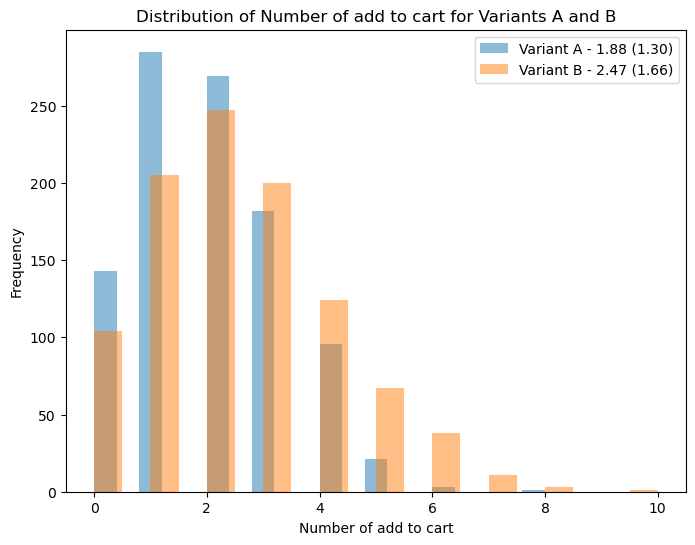

T-Statistic: -8.777389396187946
P-Value: 1.7585393725326104e-18
Reject H0? ie variant B is better True
=== No equal variance assumption
T-Statistic: -8.777389396187948
P-Value: 1.8344493489692653e-18
Reject H0? ie variant B is better True


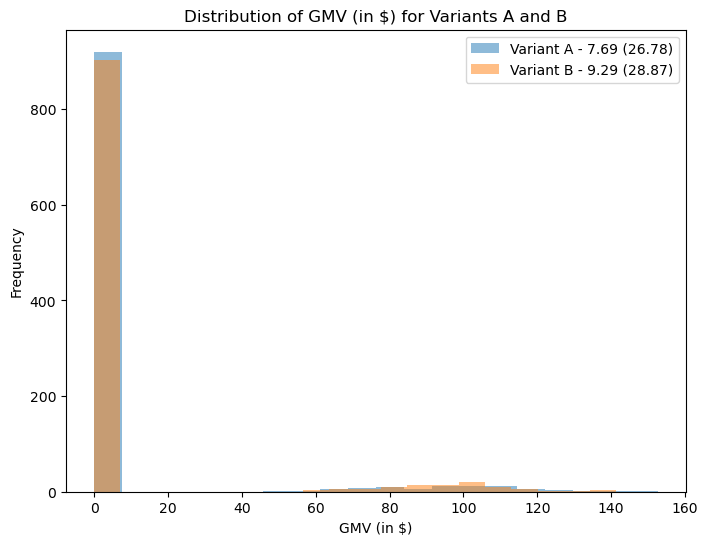

T-Statistic: -1.2839539769831623
P-Value: 0.09965346459101122
Reject H0? ie variant B is better False
=== No equal variance assumption
T-Statistic: -1.2839539769831623
P-Value: 0.09965388089258656
Reject H0? ie variant B is better False


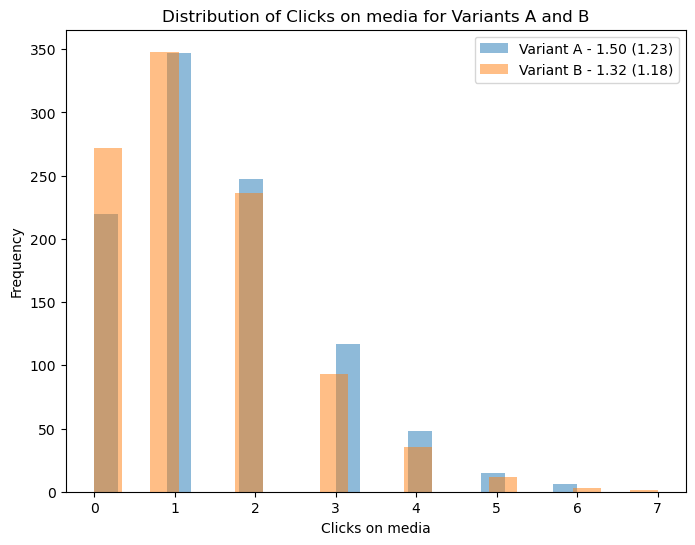

T-Statistic: 3.1710702328903153
P-Value: 0.9992290905359075
Reject H0? ie variant B is better False
=== No equal variance assumption
T-Statistic: 3.1710702328903153
P-Value: 0.9992290711420058
Reject H0? ie variant B is better False


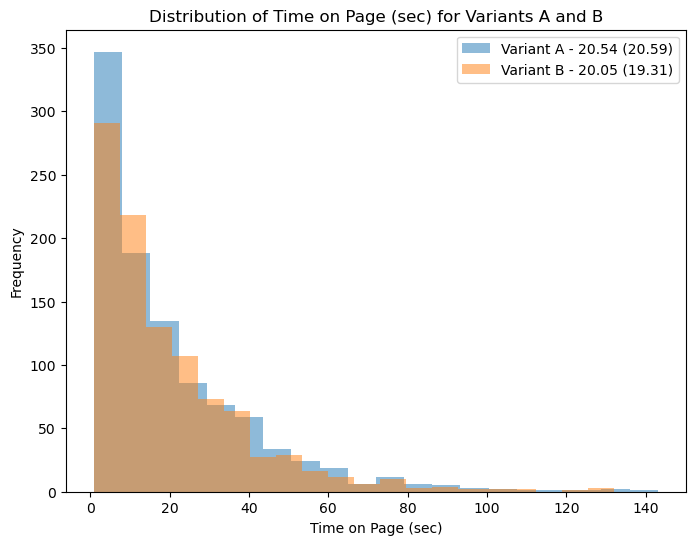

T-Statistic: 0.5554299489081426
P-Value: 0.7106686029591445
Reject H0? ie variant B is better False
=== No equal variance assumption
T-Statistic: 0.5554299489081426
P-Value: 0.7106684760833926
Reject H0? ie variant B is better False


In [8]:
metrics = [
    'Number of page views',  
    'Number of add to cart', 
    'GMV (in $)',
    'Clicks on media', 
    'Time on Page (sec)'
]
for metric in metrics:
    plt.figure(figsize=(8, 6))
    for variant in ['A', 'B']:
        data_variant = data[data['Variant'] == variant]
        mean = np.mean(data_variant[metric])
        sd = np.sqrt(np.var(data_variant[metric]))
        plt.hist(data_variant[metric], bins=20, alpha=0.5, label=f'Variant {variant} - {mean:.2f} ({sd:.2f})')
        if variant == 'A':
            metric_A = data_variant[metric]
        elif variant == 'B':
            metric_B = data_variant[metric]
    
    plt.title(f"Distribution of {metric} for Variants A and B")
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    # Print the t-statistic and p-value
    #alternative : {'two-sided', 'less', 'greater'}
    alternative = 'less'
    t_statistic, p_value = stats.ttest_ind(metric_A, metric_B, alternative=alternative)
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)
    print("Reject H0? ie variant B is better", p_value < 0.05)
    
    t_statistic, p_value = stats.ttest_ind(metric_A, metric_B, alternative=alternative, equal_var=False)
    print("=== No equal variance assumption")
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)
    print("Reject H0? ie variant B is better", p_value < 0.05)